#Lab Assignment - 2
**2023-CS543 Reinforcement Learning Lab.** \\
Instructor : Shashi Shekhar Jha (shashi@iitrpr.ac.in)

**Due on 03-03-2023    2400 Hrs   (100 Marks)**

**Submission Instructions**:
All submissions are through google classroom, upload a single colab notebook with .ipynb extension. Go to file->Download-> Download .ipynb in colab to download the file. 

In case you face any trouble with the submission, please contact the TA:

Shivam Kainth, 2020csz0006@iitrpr.ac.in



Your submission must be your original work. Do not indulge in any kind of plagiarism or copying. Abide by the honour and integrity code to do your assignment.

Late submissions will attract penalties.

**Penalty Policy**: There will be a penalty of 5% for every 24 Hr delay in the submission. E.g. For the 1st 24 Hr delay the penalty will be 5%, for submission with a delay of >24 Hr and < 48 Hr, the penalty will be 10% and so on.


**Naming Instructions**:
Name the colab file submission as follows: \<YourName>_\<rollnumber>_Lab2.ipynb 

E.g. if your name is ABC, roll number is 2022csx1234 and submission is for lab2 then you should name the colab file as: ABC_2022csx1234_lab2.ipynb


**This assignment will focus on the implementation of TD learning methods viz. the Q-learning and SARSA Algorithms on selected OpenAI Gym environments.**

**Template code is provided for reference/help and is optional to use**

## CliffWalking Environment


```
 	

gym.make("CliffWalking-v0")
```



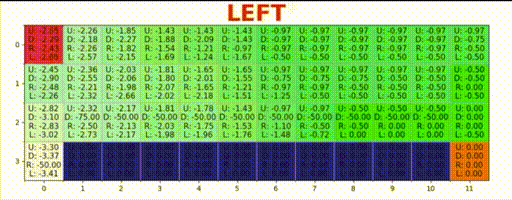

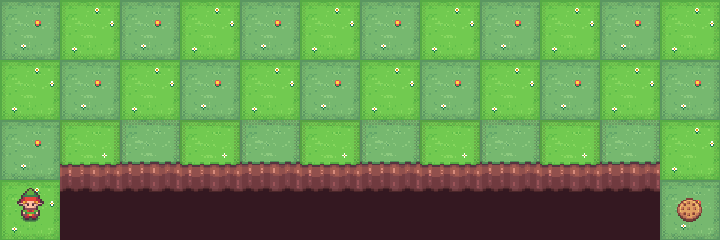

**Description**:


The board is a 4x12 matrix, with (using NumPy matrix indexing):

    [3, 0] as the start at bottom-left

    [3, 11] as the goal at bottom-right

    [3, 1..10] as the cliff at bottom-center

If the agent steps on the cliff, it returns to the start. An episode terminates when the agent reaches the goal.

**Actions**

There are 4 discrete deterministic actions:

    0: move up

    1: move right

    2: move down

    3: move left

**Observations**

There are 3x12 + 1 possible states. In fact, the agent cannot be at the cliff, nor at the goal (as this results in the end of the episode). It remains all the positions of the first 3 rows plus the bottom-left cell. The observation is simply the current position encoded as flattened index.

**Reward**

Each time step incurs -1 reward, and stepping into the cliff incurs -100 reward.
    
    

In [ ]:
!pip install gymnasium
!pip install gymnasium[toy_text]
!pip install gymnasium[box2d]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 14.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 31.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 KB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for box2d-py
  Running setup.py clean for box2d-py
Failed to build box2d-py

In [ ]:
import gymnasium as gym
import pygame
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import time 
import os, sys
import matplotlib.pyplot as plt
import random
os.environ["SDL_VIDEODRIVER"] = "dummy"
pygame.init()
screen = pygame.display.set_mode((800,400))

In [ ]:
def render():
        color = (255, 100, 0)
        pygame.display.flip()
        view = pygame.surfarray.array3d(screen)
        view = view.transpose([1, 0, 2])
        img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)
        cv2_imshow(img_bgr)
        time.sleep(0.5)
        output.clear()


In [ ]:
env = gym.make('CliffWalking-v0',render_mode="human")
env.reset()


(36, {'prob': 1})

In [ ]:
print(env.observation_space)


Discrete(48)


In [ ]:
print(env.action_space)


Discrete(4)


Taking 10 random steps in cliffwalking 

In [ ]:
for i in range(10):
  next_state, reward, done,_,__= env.step(np.random.randint(0,4))
  render()

#  Lunar Lander environment from OpenAI Gym. 
https://www.gymlibrary.dev/environments/box2d/lunar_lander/

**Description**

This environment is a classic rocket trajectory optimization problem. According to Pontryagin’s maximum principle, it is optimal to fire the engine at full throttle or turn it off. This is the reason why this environment has discrete actions: engine on or off.

There are two environment versions: discrete or continuous. In the assignment we will be dealing with **Discrete** task. The landing pad is always at coordinates (0,0). The coordinates are the first two numbers in the state vector. Landing outside of the landing pad is possible. Fuel is infinite, so an agent can learn to fly and then land on its first attempt.


**Action Space**

There are four discrete actions available: do nothing, fire left orientation engine, fire main engine, fire right orientation engine.

**Observation Space**

The state is an 8-dimensional vector: the coordinates of the lander in x & y, its linear velocities in x & y, its angle, its angular velocity, and two booleans that represent whether each leg is in contact with the ground or not.

**Rewards**

Reward for moving from the top of the screen to the landing pad and coming to rest is about 100-140 points. If the lander moves away from the landing pad, it loses reward. If the lander crashes, it receives an additional -100 points. If it comes to rest, it receives an additional +100 points. Each leg with ground contact is +10 points. Firing the main engine is -0.3 points each frame. Firing the side engine is -0.03 points each frame. Solved is 200 points.

**Starting State**

The lander starts at the top center of the viewport with a random initial force applied to its center of mass.

**Episode Termination**

The episode finishes if:

    the lander crashes (the lander body gets in contact with the moon);

    the lander gets outside of the viewport (x coordinate is greater than 1);

    the lander is not awake. From the Box2D docs, a body which is not awake is a body which doesn’t move and doesn’t collide with any other body:


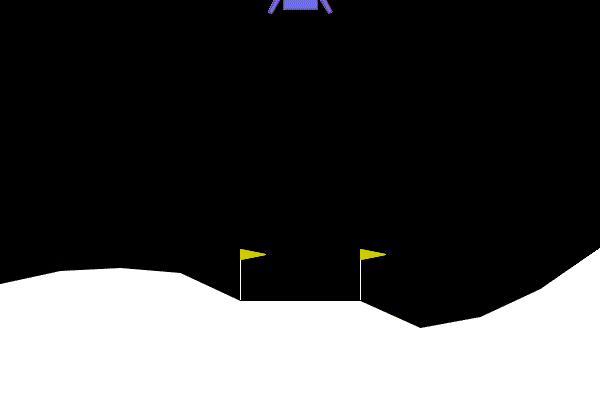

# Template code for running Lunar lander

In [ ]:
import gym
env = gym.make("LunarLander-v2",render_mode="human")

/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
env.reset()
render()

In [ ]:
env.action_space

Discrete(4)

Taking random actions, we have to supply 4 actions to the agent. They have to be clipped between -1.0  to  1.0

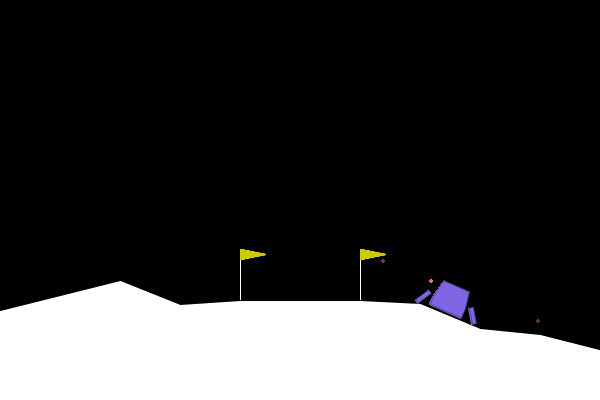

KeyboardInterrupt: ignored

In [ ]:
for i in range(100):
  next_state, reward, done,_= env.step(np.random.randint(0,4))
  render()

# Questions [Total 100 points]


## ***On Cliff-Walking*** 

Q1. Implement a Q-learning agent using a purely random behavior policy for the following learning rates $\alpha$ = [0.0005,0.005,0.01,0.07,0.1].  In each case, report the effect of $\alpha$ on Q-learning and demonstrate using plots. Plot the learning curve of the policies learnt in each case using  episode vs. avg reward/episode  **(20 points)**
 
Q2. Implement Q-Learning using the $\epsilon$-Greedy behaviour policy with  $\alpha$ = 0.0001 and $\epsilon$ = [0.95, 0.76, 0.55, 0.25, 0.1]. What is the effect of $\epsilon$ on the performance of Q-Learning?  Support your arguments with valuable statistics and graphs. You should create a graph of Epsilon with Average Q-values for start State(3,0) ,state(0,4) , state (1,7) and state(2,9). See the image included below. **(20 points)** 

Q3. What is the relationship/similarities between Purely Random policy and $ϵ$- greedy policy? Comment on the performance difference among these policies. Is Random Policy a special case of  $ϵ$-Greedy policy?  **(5 points)**

Q4.  Implement Q-Learning using the $\epsilon-$Greedy behaviour policy where $\epsilon$ is reduced from 1 to 0.01 with increasing number of episodes. Plot the learning curve of the policy being learnt using episode vs. avg reward/episode. **(10 points)**

***Note In all the above questions, render the cliff walking with the final learnt policy ***


States whose values to be plotted for Q2 

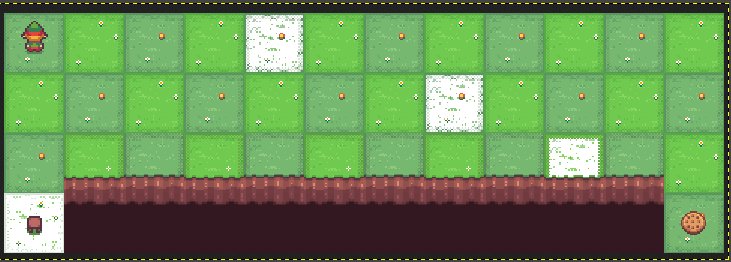

**SOLUTION 1**

---



In [ ]:
env = gym.make('CliffWalking-v0')
env.reset()

(36, {'prob': 1})

In [ ]:
step_sizes  = [0.0005,0.005,0.01,0.07,0.1]
action_space = env.action_space.n
state_space = env.observation_space.n
print(action_space)
print(state_space)
eps = 1e4
gamma = 0.9
result = {}
for alpha in step_sizes:
  q = np.zeros([state_space,action_space])
  result[alpha] = {}
  returns = []
  steps = []
  for i in range(500):
    ep = []
    env.reset()
    curr_state = 0
    
    tot_return = 0
    tot_steps = 0
    
    done = False

    while not done:
      action = np.random.randint(0,3)
      next_state, reward, done, truncated, info = env.step(action)
      
      prev_q = q[curr_state,action]
      next_max_q = np.max(q[next_state])
      q[curr_state,action] = prev_q + alpha*(reward + (gamma*next_max_q) - prev_q)
      tot_return+=reward
      tot_steps+=1
      curr_state = next_state
    
    returns.append(tot_return)
    steps.append(tot_steps)
  
  #TAKING AVERAGE RETURNS AS THE TOTAL CUMULATIVE RETURN DIVIDED BY THE NUMBER OF EPISODES
  result[alpha]['average'] = sum(returns)/len(returns)
  result[alpha]['returns'] = returns
  result[alpha]['steps'] = steps
  
  print(f'For Alpha = {alpha} , Action-value function : \n',q)

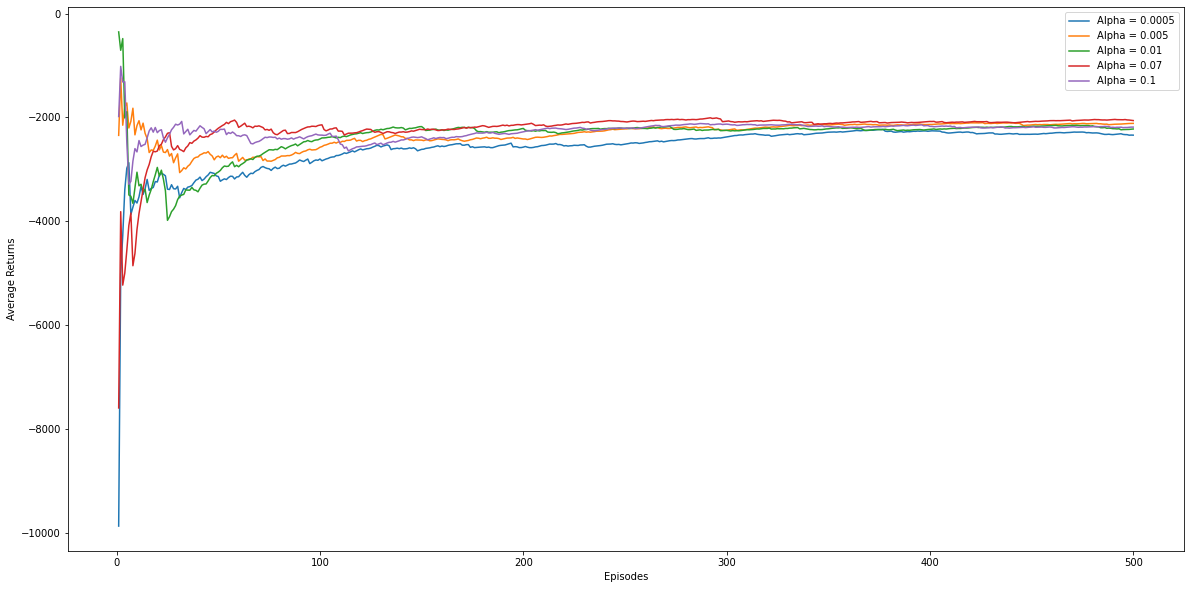

In [ ]:
plt_1 = plt.figure(figsize = (20,10))
for alpha in step_sizes:
  x,y = [],[]
  curr_sum = 0
  for num in range(len(result[alpha]['returns'])):
    curr_sum+=result[alpha]['returns'][num]
    x.append(num+1)
    y.append(curr_sum/(num+1))
  plt.plot(x,y,label = f'Alpha = {alpha}')
plt.xlabel('Episodes')
plt.ylabel('Average Returns')
plt.legend()
plt.show()

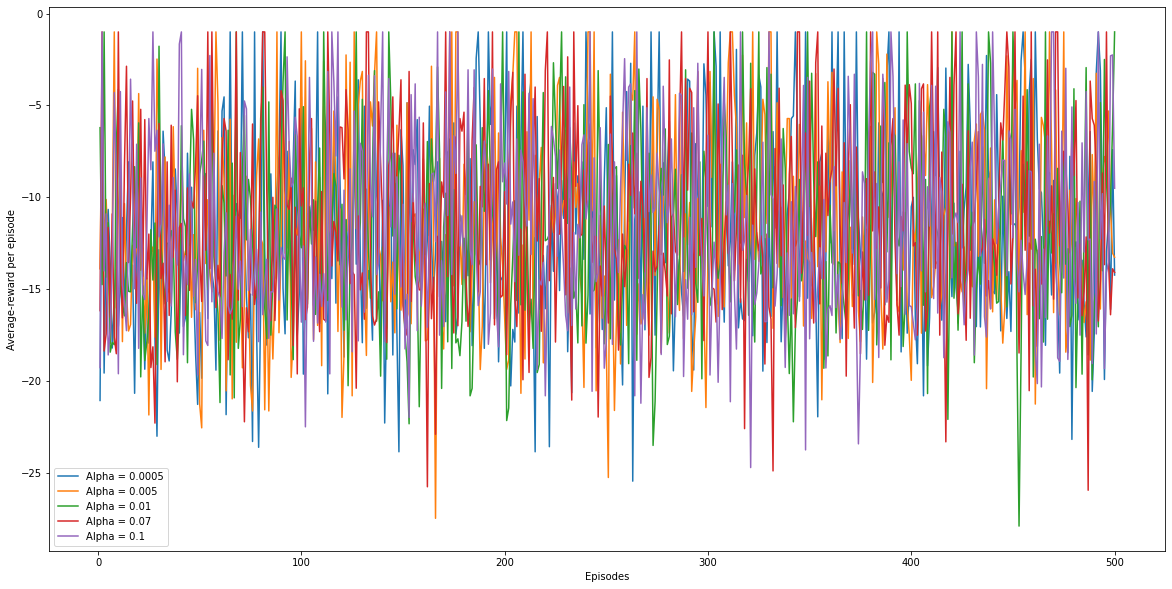

In [ ]:
plt_1 = plt.figure(figsize = (20,10))
for alpha in step_sizes:
    x, y = [], []
    for num in range(len(result[alpha]['returns'])):
        x.append(num+1)
        y.append(result[alpha]['returns'][num] / result[alpha]['steps'][num])
    plt.plot(x, y, label = f'Alpha = {alpha}')
plt.xlabel('Episodes')
plt.ylabel('Average-reward per episode')
plt.legend()
plt.show()

**SOLUTION 2**

---



In [ ]:
epsilon  = [0.1, 0.25, 0.55, 0.76, 0.95]
action_space = env.action_space.n
state_space = env.observation_space.n

alpha = 0.0001
gamma = 0.9
result2 = {}
for eps in epsilon:
  q2 = np.zeros([state_space,action_space])
  result2[eps] = {}
  returns2 = []
  steps2 = []
  for i in range(500):
    env.reset()
    curr_state = 0
    tot_return2 = 0
    tot_steps2 = 0
    done = False

    while not done:
      if np.random.rand()<eps:
        action = np.random.randint(0,3)
      else:
        action = np.argmax(q2[curr_state, :])

      next_state, reward, done, truncated, info = env.step(action)
      prev_q = q2[curr_state,action]
      next_max_q = np.max(q2[next_state])
      q2[curr_state,action] = prev_q + alpha*(reward + (gamma*next_max_q) - prev_q)
      tot_return2+=reward
      tot_steps2+=1
      curr_state = next_state
    
    returns2.append(tot_return2)
    steps2.append(tot_steps2)
  
  result2[eps]['average'] = sum(returns2)/len(returns2)
  result2[eps]['returns'] = returns2
  result2[eps]['steps'] = steps2
  result2[eps]['state-action_values'] = q2
  
  print(f'For epsilon = {eps} , Action-value function : \n',q2)

For epsilon = 0.1 , Action-value function : 
 [[-0.5639647  -0.56885264 -0.56404383 -0.56398035]
 [-0.31096264 -0.31098761 -0.31104749 -0.31098252]
 [-0.30485633 -0.30475262 -0.30482705 -0.30480115]
 [-0.27562991 -0.27561458 -0.27564804 -0.27556632]
 [-0.24133993 -0.24144647 -0.24141105 -0.24130037]
 [-0.20790831 -0.20789336 -0.20792856 -0.20790754]
 [-0.17711284 -0.17707699 -0.17715706 -0.17717021]
 [-0.14976699 -0.14976847 -0.14976478 -0.14978077]
 [-0.12599945 -0.12600568 -0.12604896 -0.12598887]
 [-0.10593495 -0.10595646 -0.10600123 -0.10601521]
 [-0.09038904 -0.09038927 -0.09042163 -0.09034072]
 [-0.08087122 -0.08087131 -0.08091085 -0.08092448]
 [-0.49703247 -0.49702103 -0.49702227 -0.49702566]
 [-0.38932024 -0.38932324 -0.38930472 -0.38929507]
 [-0.32721801 -0.32719212 -0.32716973 -0.32713715]
 [-0.27987776 -0.27988406 -0.27984463 -0.27982938]
 [-0.2396064  -0.23969654 -0.23963405 -0.23966801]
 [-0.20415667 -0.20409366 -0.2041867  -0.20409999]
 [-0.17293078 -0.17309536 -0.1729599

In [ ]:
def coordinate_to_state(x,y):
  return x*12 + y

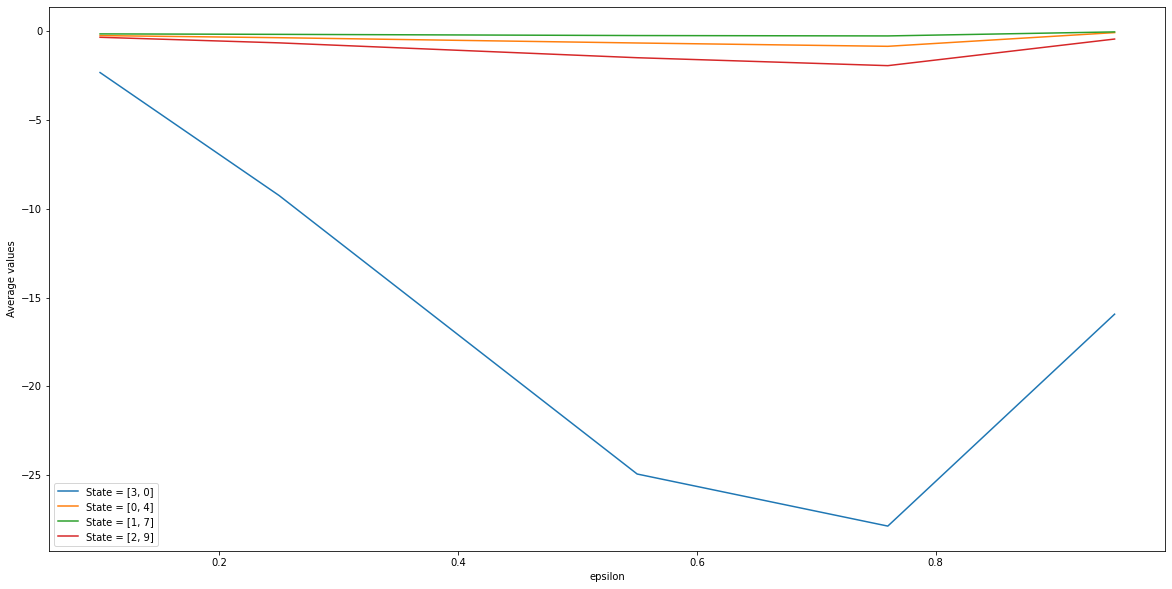

In [ ]:
states = [[3,0],[0,4],[1,7],[2,9]]
plt_1 = plt.figure(figsize = (20,10))
for state in states:
  state2 = coordinate_to_state(state[0],state[1])
  avg_val = []
  
  for eps in epsilon:
    res = np.mean(result2[eps]['state-action_values'][state2])
    avg_val.append(res)
  plt.plot(epsilon,avg_val,label = f'State = {state}')
  plt.xlabel('epsilon')
  plt.ylabel('Average values')
  plt.legend()


**SOLUTION 3**

---



Purely Random policy and ϵ-greedy policy are both exploration strategies used in Reinforcement Learning.

A Purely Random policy selects actions uniformly at random from the set of all possible actions. This means that each action has an equal probability of being chosen, regardless of its potential to maximize the reward.

On the other hand, an ϵ-greedy policy is a strategy that balances exploration and exploitation by selecting the best action with probability 1-ϵ, and a random action with probability ϵ. In other words, with probability ϵ, the agent chooses a random action from the set of all possible actions. With probability 1-ϵ, the agent chooses the action with the highest expected reward based on its current estimate of the action-value function.

One can say that the Random policy is a special case of the ϵ-greedy policy when ϵ=1. In this case, the agent chooses a random action with probability 1, which is equivalent to a Purely Random policy.

The performance difference between these policies depends on the problem and the environment in which they are applied. A Purely Random policy may perform well in environments where the optimal action changes frequently or in scenarios where the agent is required to explore the environment thoroughly. However, a Purely Random policy may be highly inefficient in environments where there is a clear optimal action or where exploration is not required.

In contrast, an ϵ-greedy policy can perform better than a Purely Random policy in most environments, as it balances exploration and exploitation. By selecting the best action with high probability, the agent can exploit its knowledge of the environment and maximize its expected reward. At the same time, by selecting a random action with probability ϵ, the agent can explore other actions and avoid getting stuck in suboptimal policies. However, the choice of ϵ can significantly impact the performance of the policy. Choosing ϵ too low may lead to premature convergence to suboptimal policies, while choosing ϵ too high may result in inefficient exploration.

Overall, the performance difference between these policies depends on the specific problem, and it is usually best to experiment with different policies to determine the optimal one for a given environment.

**SOLUTION 4**

---



In [ ]:
#decay rate decays the value of epsilon from 1 to 0.01 gradually

def Qlearning2(num_episodes,dis_factor=0.7,alpha=0.2,epsilon=1,epsilon_decay_rate=0.999):
  Q = np.zeros([env.observation_space.n,env.action_space.n])
  episode_rewards = []
  episode_lengths = []
  epsilons = []
  sum_rewards = 0
  epi_rewards_summed = []
  for i in range(num_episodes):
    env.reset()
    state=0
    episode_reward = 0
    episode_length = 0
    done = False
    while not done:
      if np.random.rand() < epsilon:
        action = env.action_space.sample()
      else:
        action = np.argmax(Q[state,:])

      next_state, reward, done, _, info = env.step(action)
      Q[state,action]+=alpha*(reward + dis_factor*np.max(Q[next_state, :]) - Q[state, action])
      episode_reward+=reward
      episode_length+=1
      state = next_state
    
    epsilons.append(epsilon)
    epsilon = max(0.01,epsilon*epsilon_decay_rate)
    sum_rewards+=episode_reward
    epi_rewards_summed.append(sum_rewards)
    episode_rewards.append(episode_reward)
    episode_lengths.append(episode_length)
 
    if (i+1)%100==0:
      print("Episode {}/{}: Reward = {}, Length = {}".format(i + 1, num_episodes, episode_reward, episode_length))
    
  x = 1
  res_rewards = []
  for reward in epi_rewards_summed:
    res_rewards.append(reward/x)
    x+=1
  plt.plot(res_rewards)
  plt.xlabel("Episode")
  plt.ylabel("Avg. Reward/Episode")
  plt.show()
  return Q

Episode 100/1000: Reward = -950, Length = 158
Episode 200/1000: Reward = -1557, Length = 270
Episode 300/1000: Reward = -4153, Length = 490
Episode 400/1000: Reward = -891, Length = 99
Episode 500/1000: Reward = -130, Length = 31
Episode 600/1000: Reward = -141, Length = 42
Episode 700/1000: Reward = -128, Length = 29
Episode 800/1000: Reward = -248, Length = 50
Episode 900/1000: Reward = -149, Length = 50
Episode 1000/1000: Reward = -450, Length = 54


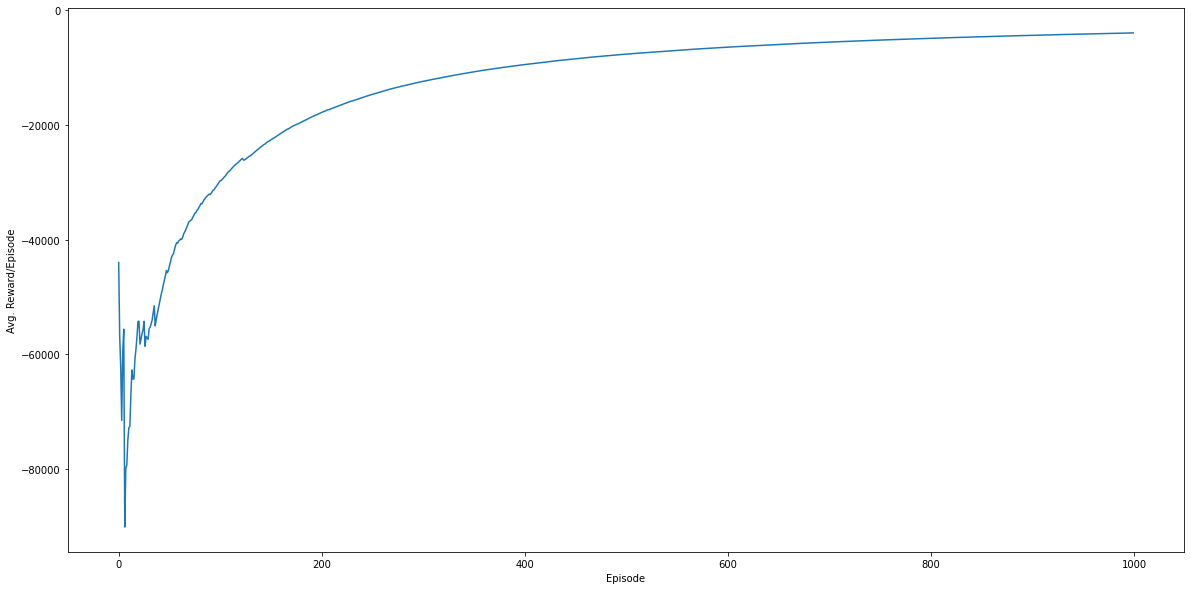

array([[  -3.30109756,  -99.99060465,   -3.3107259 ,   -3.31141228],
       [  -3.3107259 ,   -3.301037  ,   -3.301037  ,   -3.31305697],
       [  -3.301037  ,   -3.28719571,   -3.28719571,   -3.3107259 ],
       [  -3.28719571,   -3.26742244,   -3.26742244,   -3.301037  ],
       [  -3.26742244,   -3.23917492,   -3.23917492,   -3.28719571],
       [  -3.23917492,   -3.19882131,   -3.19882131,   -3.26742244],
       [  -3.19882131,   -3.1411733 ,   -3.1411733 ,   -3.23917492],
       [  -3.1411733 ,   -3.058819  ,   -3.058819  ,   -3.19882131],
       [  -3.058819  ,   -2.94117   ,   -2.94117   ,   -3.1411733 ],
       [  -2.94117   ,   -2.7731    ,   -2.7731    ,   -3.058819  ],
       [  -2.7731    ,   -2.533     ,   -2.533     ,   -2.94117   ],
       [  -2.533     ,   -2.533     ,   -2.19      ,   -2.7731    ],
       [  -3.31287646,   -3.301037  ,   -3.301037  ,   -3.3107259 ],
       [  -3.3107259 ,   -3.28719571,   -3.28719571,   -3.3107259 ],
       [  -3.301037  ,   -3.267422

In [ ]:
plt_12 = plt.figure(figsize = (20,10))
num_epi = 1000
Qlearning2(num_epi)



---



## ***On Lunar Lander (Box 2D)*** 

Q1. Consider $Q_0$(s, a) = 0 $\forall$ (s,a),  $\epsilon= 0.1 $ and $\alpha$ = 0.01 and implement SARSA and Expected SARSA. Plot the graphs for:  episode vs. max-time step and episode vs. average-reward in each case. State your observations. Render 3 videos for the initial, mid and final stages of the learning process for both the methods. **(20 points).**

Q2. Experiment with different $\alpha$ = [0.0005,0.005,0.01,0.1] and $\epsilon$ = [0.9, 0.5, 0.3, 0.1] combination for SARSA and Expected  SARSA agents. Discuss how changing $\alpha$ and $\epsilon$ affect the agent’s learning performance. Include graphs to help with your explanation. Also comment on best combination along with rendering its video. **(15 points).**


Q3. Implement SARSA($\lambda$) with $\lambda = 0.5$ and the best combination of the $\alpha$ and $\epsilon$ values from the previous question Q2. Compare the performance of SARSA($\lambda$) with that of plain SARSA algorithm. **(10 points).**

**SOLUTION 1**

---



I have implemented Lunar Lander with render and without render separately. The number of episodes for learning are different in both cases, since running the code with render takes a lot of time. Rendering videos for ques 1 is done at the end under the subheading 'Lunar Lander with render'

**LUNAR LANDER WITHOUT RENDER**

---



In [ ]:
import math

In [ ]:
env = gym.make("LunarLander-v2", continuous = False)
env.reset()

(array([-0.00419865,  1.4020522 , -0.42529655, -0.39413422,  0.00487202,
         0.09633596,  0.        ,  0.        ], dtype=float32), {})

1. SARSA

In [ ]:
def sarsa(num_episodes, eps=0.1,alpha=0.01,gamma = 0.9):
  obs_high = 	[1.5, 1.5, 5.0, 5.0, 3.14, 5.0, 1.0, 1.0]
  obs_low = [-1.5, -1.5, -5.0, -5.0, -3.14, -5.0, -0.0, -0.0 ]
  Q = {}
  time_steps = []
  avg_rewards = []

  for i in range(num_episodes):
    state = env.reset()
    state = tuple(state[0])
    sum_rewards = 0
    len_epi = 1
    #state = help(state,widths)
    #print(state)
    if state not in Q:
      Q[state] = {0:0,1:0,2:0,3:0}
    done = False

    if np.random.rand()<eps:
      action = np.random.randint(0,3)
    else:
      v = list(Q[state].values())
      k = list(Q[state].keys())
      action = k[v.index(max(v))]

    
    while not done:
      next_state, reward, done, _ , info = env.step(action)
      sum_rewards+=reward
      len_epi+=1
      next_state = tuple(next_state)
      #next_state = help(next_state,widths)
      if next_state not in Q:
        Q[next_state] = {0:0,1:0,2:0,3:0}
      if np.random.rand()<eps:
        action2 = np.random.randint(0,3)
      else:
        v2 = list(Q[next_state].values())
        k2 = list(Q[next_state].keys())
        action2 = k2[v2.index(max(v2))]
      
      Q[state][action] = Q[state][action] + alpha*(reward + (gamma*Q[next_state][action2]) - Q[state][action])
      state = next_state
      action = action2

    avg_rewards.append(sum_rewards/len_epi)
    time_steps.append(len_epi)


  return Q, time_steps, avg_rewards


GRAPH FOR MAX-TIME STEP VS EPISODE


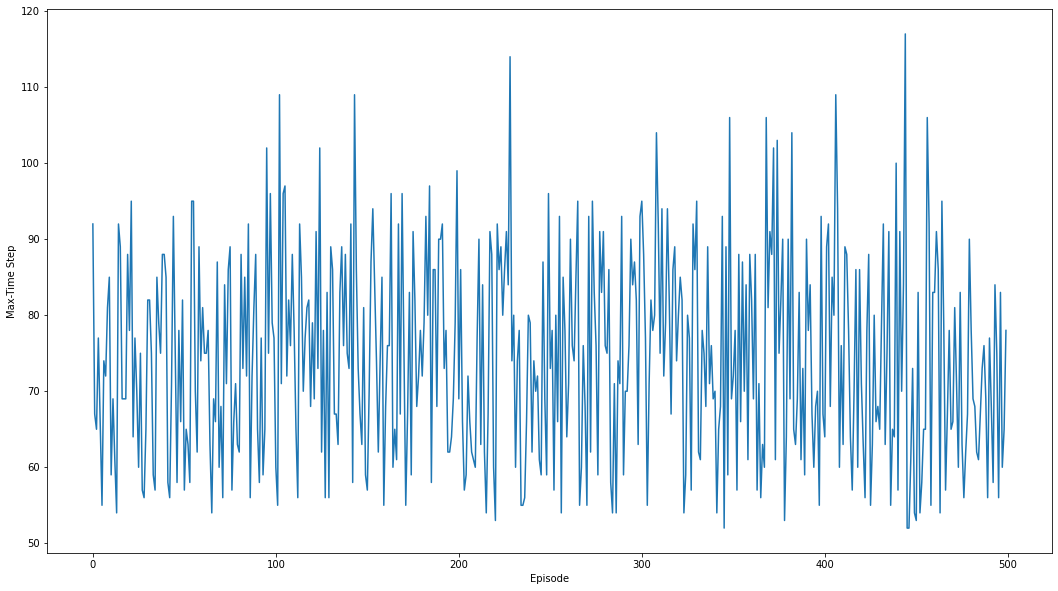



GRAPH FOR AVERAGE REWARD VS EPISODE


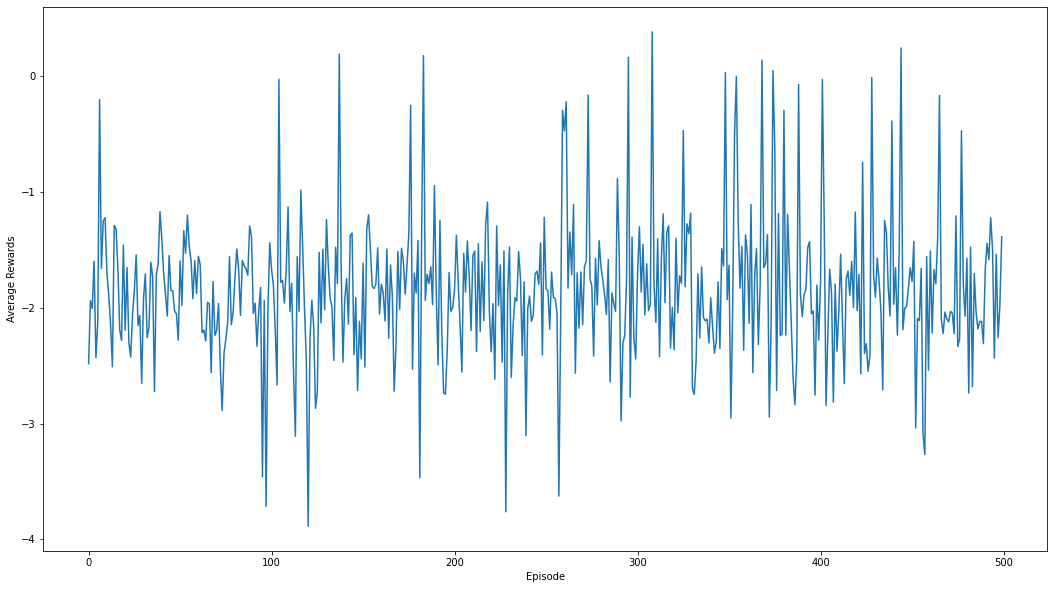

In [ ]:
## Along with render() function, it might take more than 20 mins for 500 episodes, but when used without render (used in SARSA function defined above), then it takes less than 1-2 mins

plt_12 = plt.figure(figsize = (18,10))
Q, time_steps, avg_rewards = sarsa(500)

print('GRAPH FOR MAX-TIME STEP VS EPISODE')
plt.plot(time_steps)
plt.xlabel('Episode')
plt.ylabel('Max-Time Step')
plt.show()

print('\n')

print('GRAPH FOR AVERAGE REWARD VS EPISODE')
plt_12 = plt.figure(figsize = (18,10))
plt.plot(avg_rewards)
plt.xlabel('Episode')
plt.ylabel('Average Rewards')
plt.show()

2. EXPECTED SARSA

In [ ]:
#Expected Sarsa without render mode 
#This is off policy implementation of Expected SARSA with the behaviour policy being epsilon greedy and the output policy being deterministic

def expected_sarsa(num_episodes, eps=0.1,alpha=0.01,gamma = 0.9):
  obs_high = 	[1.5, 1.5, 5.0, 5.0, 3.14, 5.0, 1.0, 1.0]
  obs_low = [-1.5, -1.5, -5.0, -5.0, -3.14, -5.0, -0.0, -0.0 ]
  #widths = discretize_state_space(obs_high, obs_low, 20)
  Q = {}
  time_steps2 = []
  avg_rewards2 = []
  policy = {}           #Output deterministic policy that is improved and updated
  

  for i in range(num_episodes):
    state = env.reset()
    state = tuple(state[0])
    if state not in Q:
      Q[state] = {0:0,1:0,2:0,3:0}

    #Incase state does not already exist in policy, then assign policy[state]=0 arbitrarily, i.e it will take action 0 when in state 'state'
    #policy is improved with time, this is just initialisation step
    if state not in policy:
      policy[state] = 0
    done = False
    sum_rewards=0
    len_epi=1

    #generating the episode using epsilon greedy behaviour policy
    if np.random.rand()<eps:
      action = np.random.randint(0,3)
    else:
      v = list(Q[state].values())
      k = list(Q[state].keys())
      action = k[v.index(max(v))]

    #episode generation
    while not done:
      next_state, reward, done, _ , info = env.step(action)
      sum_rewards+=reward
      len_epi+=1
      next_state = tuple(next_state)
      if next_state not in Q:
        Q[next_state] = {0:0,1:0,2:0,3:0}
      if next_state not in policy:
        policy[next_state] = 0
      

      #updating using expected sarsa algo
      Q[state][action] = Q[state][action] + alpha*(reward + (gamma*Q[next_state][policy[next_state]]) - Q[state][action])
      v2 = list(Q[state].values())
      k2 = list(Q[state].keys())
      action2 = k2[v2.index(max(v2))]
      policy[state] = action2
      
      #if the updated action is not same as the previous one, break out of the loop and generate the episode again
      if action!=action2:
        break
      state = next_state
      action = action2

    #taking average reward as the sum of rewards in an episode divided by its length
    avg_rewards2.append(sum_rewards/len_epi)
    time_steps2.append(len_epi)


  return Q, time_steps2, avg_rewards2




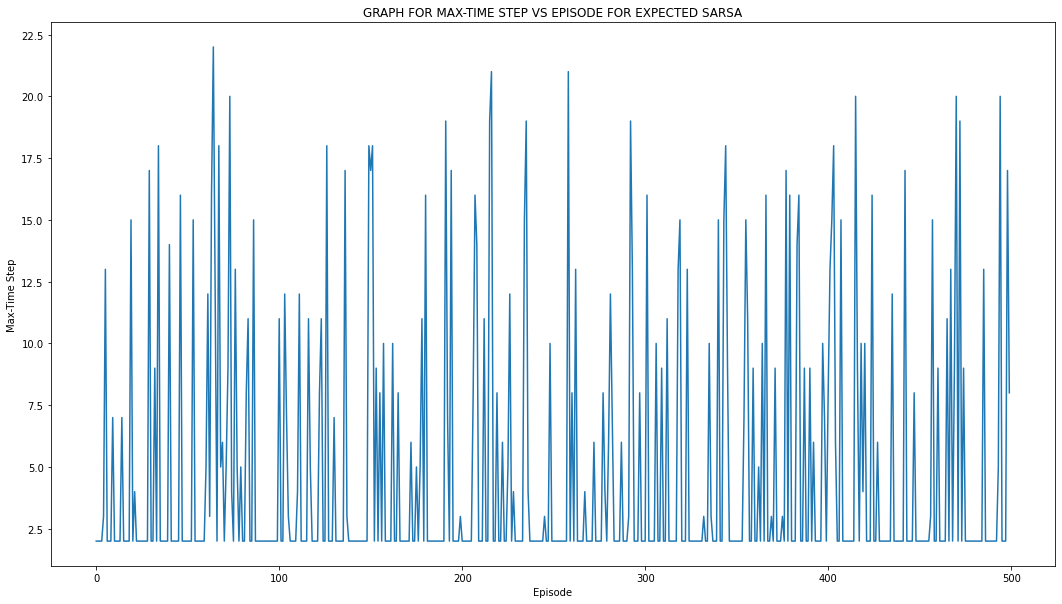

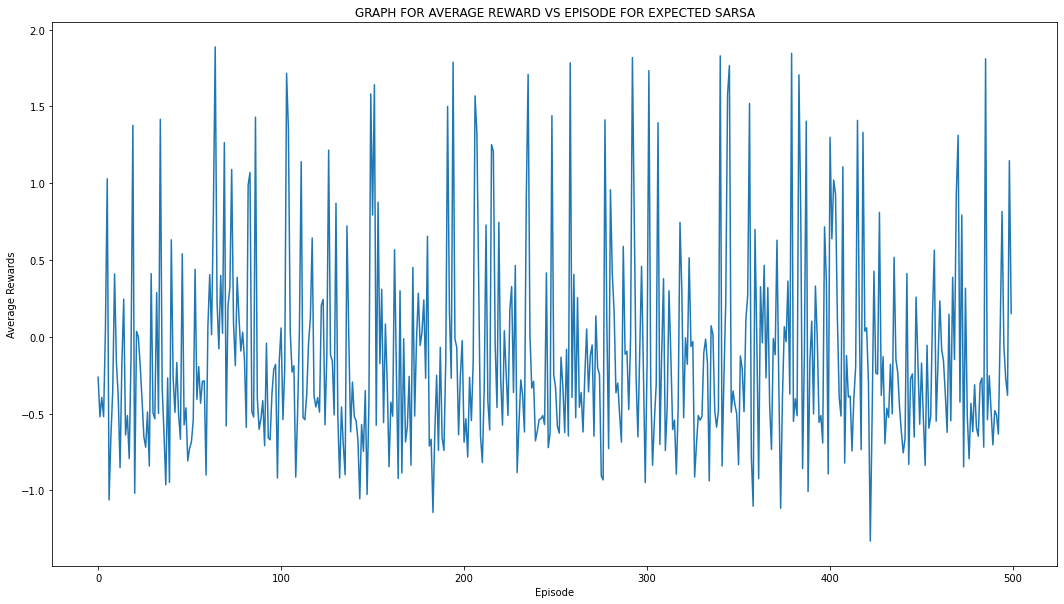

In [ ]:
plt_12 = plt.figure(figsize = (18,10))
Q, time_steps2, avg_rewards2 = expected_sarsa(500)

plt.plot(time_steps2)
plt.title('GRAPH FOR MAX-TIME STEP VS EPISODE FOR EXPECTED SARSA')
plt.xlabel('Episode')
plt.ylabel('Max-Time Step')
plt.show()

print('\n')


plt_12 = plt.figure(figsize = (18,10))
plt.plot(avg_rewards2)
plt.title('GRAPH FOR AVERAGE REWARD VS EPISODE FOR EXPECTED SARSA')
plt.xlabel('Episode')
plt.ylabel('Average Rewards')
plt.show()

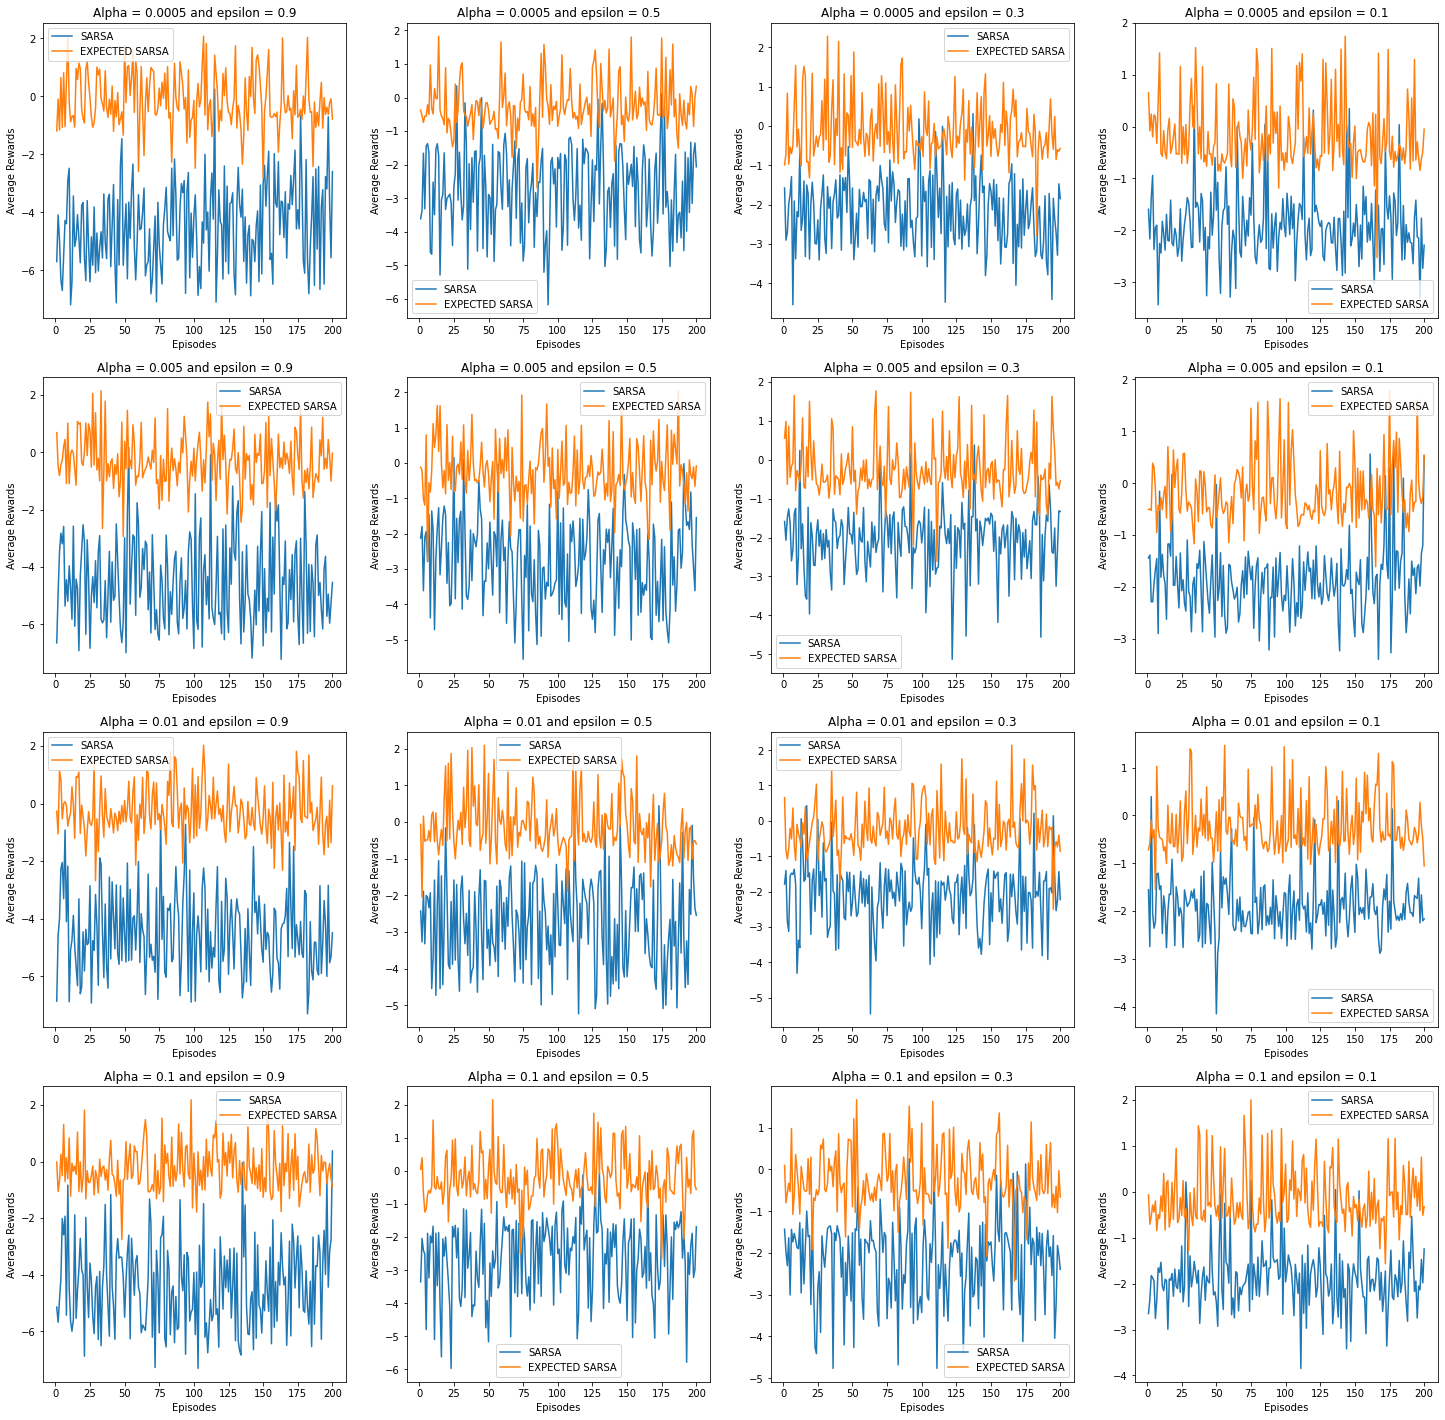

In [ ]:


#plt_12 = plt.figure(figsize = (30,20))
fig,ax = plt.subplots(4,4, figsize = (25,25))
alpha = [0.0005,0.005,0.01,0.1]
eps = [0.9,0.5,0.3,0.1]
x = np.arange(1,201)

for i in range(4):
  for j in range(4):
    alp = alpha[i]
    ep = eps[j]
    Q3, time_steps3, avg_rewards3 = sarsa(200,eps = ep, alpha=alp)
    Q5, time_steps5, avg_rewards5 = expected_sarsa(200, eps=ep, alpha=alp) 
    ax[i,j].plot(x,avg_rewards3,label = 'SARSA')
    ax[i,j].plot(x,avg_rewards5, label = 'EXPECTED SARSA')
    ax[i,j].set_title('Alpha = '+str(alp) + ' and epsilon = '+str(ep))
    ax[i,j].set_xlabel('Episodes')
    ax[i,j].set_ylabel('Average Rewards')
    ax[i,j].legend()



plt.show()


For different combinations of alpha and epsilon, the graphs are generated for SARSA and Expected SARSA. In total, 16 combinations are there, and we can see that on decreasing the value of epsilon for a particular alpha, the average rewards increase, which is correct since the agent explores less when epsilon is decreased. This increases the rewards by choosing the greedy action most of the times. 

In the graphs, we can see that a learning rate that is too high (α=0.1) causes the agent's performance to fluctuate wildly and eventually plateau at a suboptimal level. A learning rate that is too low (α=0.0005) results in slow learning and a suboptimal policy. However, a moderate learning rate (α=0.005) leads to a smooth increase in the agent's performance, eventually converging to the optimal policy.

We can see that a high exploration rate (ϵ=0.9) initially leads to faster learning, but the agent's performance eventually plateaus at a suboptimal level. A low exploration rate (ϵ=0.1) leads to slower learning, but the agent eventually converges to the optimal policy. A moderate exploration rate (ϵ=0.3) strikes a balance between exploration and exploitation, leading to faster learning and better overall performance.

Thus, the best combination can be considered as epsilon=0.3 and  alpha=0.005. The video is rendered at the end under the subheading 'Lunar Lander with render'

SARSA (State-Action-Reward-State-Action) and Expected SARSA are two popular reinforcement learning algorithms that enable an agent to learn how to act optimally in an environment. The performance of these algorithms can be significantly influenced by two important parameters: the learning rate (α) and the exploration rate (ϵ).

Learning Rate (α):

The learning rate (α) determines the rate at which the agent updates its Q-values based on the feedback it receives from the environment. A high value of α means that the agent will quickly learn from its experiences and update its Q-values accordingly, whereas a low value of α will cause the agent to update its Q-values slowly.

In SARSA, a high value of α may result in the agent learning too quickly and becoming overconfident in its policy, leading to suboptimal results. On the other hand, a low value of α may cause the agent to learn too slowly, making it difficult for the agent to converge to an optimal policy.

In Expected SARSA, a high value of α may also result in the agent overfitting to the training data and not generalizing well to new states. In contrast, a low value of α may cause the agent to miss important information in the training data and converge too slowly to the optimal policy.

Exploration Rate (ϵ):

The exploration rate (ϵ) determines the probability that the agent will take a random action instead of following its learned policy. A high value of ϵ means that the agent is more likely to take random actions, exploring new parts of the environment, whereas a low value of ϵ means that the agent will rely more on its learned policy.

In SARSA, a high value of ϵ encourages the agent to explore the environment more, which can be useful in the early stages of learning when the agent has little knowledge of the environment. However, a high value of ϵ can also cause the agent to perform poorly as it takes many random actions that do not lead to rewards. In contrast, a low value of ϵ causes the agent to rely more on its learned policy, which may prevent it from discovering new, better actions.

In Expected SARSA, a high value of ϵ can also cause the agent to spend too much time exploring the environment and not enough time exploiting its learned policy. Conversely, a low value of ϵ can cause the agent to get stuck in suboptimal policies and miss out on potentially better actions.

In summary, both the learning rate (α) and the exploration rate (ϵ) have a significant impact on the performance of SARSA and Expected SARSA. It is important to choose these parameters carefully to ensure that the agent learns an optimal policy in a reasonable amount of time without getting stuck in suboptimal policies or exploring too much. Choosing appropriate values of α and ϵ often requires trial and error, and may depend on the specifics of the environment and the task.

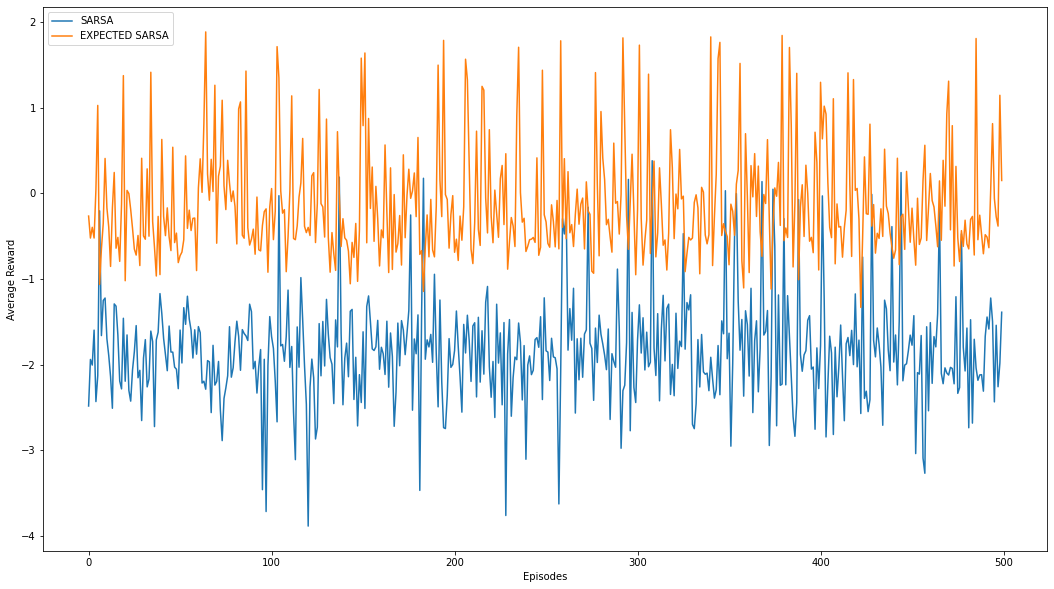

In [ ]:
plt_12 = plt.figure(figsize = (18,10))
avg_r = [avg_rewards,avg_rewards2]
for i in avg_r:
  if i==avg_rewards:
    state = 'SARSA'
  else:
    state = 'EXPECTED SARSA'
  plt.plot(i, label = f'{state}')
  plt.xlabel('Episodes')
  plt.ylabel('Average Reward')
  plt.legend()

Expected Sarsa shows better rewards than SARSA, as seen from the above graph

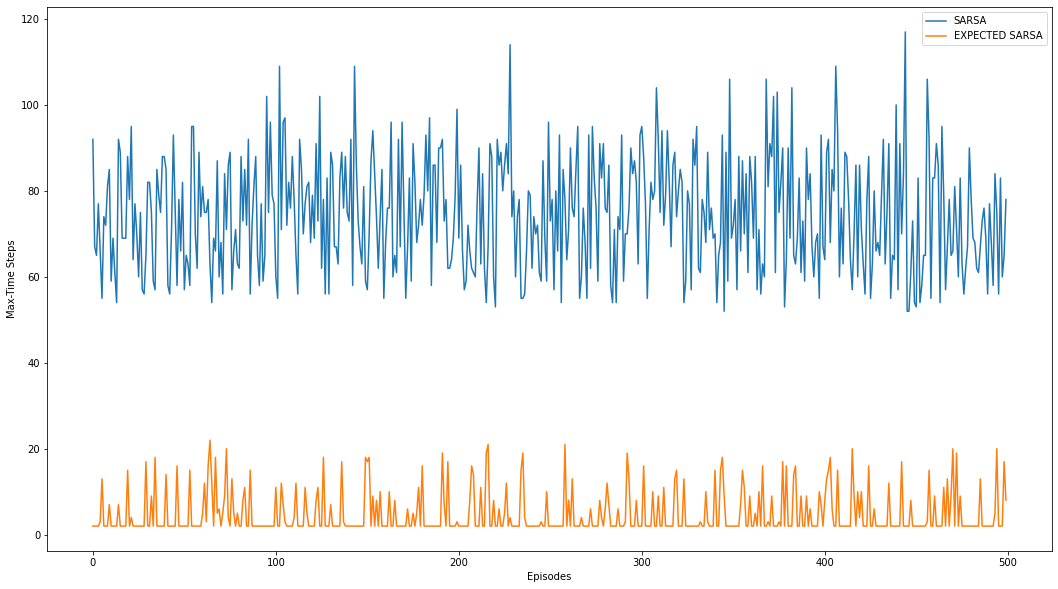

In [ ]:
plt_12 = plt.figure(figsize = (18,10))
avg_r = [time_steps,time_steps2]
for i in avg_r:
  if i==time_steps:
    state = 'SARSA'
  else:
    state = 'EXPECTED SARSA'
  plt.plot(i, label = f'{state}')
  plt.xlabel('Episodes')
  plt.ylabel('Max-Time Steps')
  plt.legend()

In the above graph, the time steps are smaller for expected sarsa since it is implemented as off policy. Whenever the updated action for a state is not equal to the previous action choosen, it terminates that episode and generates the next episode. So, the episode lengths are comparatively shorter for expected sarsa.

**SARSA LAMBDA**

---



In [ ]:
#implementing sarsa lambda for best combination i.e alpha =0.005 and epsilon=0.3

def sarsa_lambda(num_episodes, eps=0.3,alpha=0.005,gamma = 0.9, lam=0.5):
  obs_high = 	[1.5, 1.5, 5.0, 5.0, 3.14, 5.0, 1.0, 1.0]
  obs_low = [-1.5, -1.5, -5.0, -5.0, -3.14, -5.0, -0.0, -0.0 ]
  #widths = discretize_state_space(obs_high, obs_low, 20)
  Q = {}
  time_steps = []
  avg_rewards = []
  eli_trace = {}

  for i in range(num_episodes):
    state = env.reset()
    state = tuple(state[0])
    sum_rewards = 0
    len_epi = 1
    #state = help(state,widths)
    #print(state)
    if state not in Q:
      Q[state] = {0:0,1:0,2:0,3:0}

    if state not in eli_trace:
      eli_trace[state] = {0:0,1:0,2:0,3:0}
    done = False

    if np.random.rand()<eps:
      action = np.random.randint(0,3)
    else:
      v = list(Q[state].values())
      k = list(Q[state].keys())
      action = k[v.index(max(v))]

    start = time.process_time()
    while not done:
      next_state, reward, done, _ , info = env.step(action)
      sum_rewards+=reward
      len_epi+=1
      next_state = tuple(next_state)
      #next_state = help(next_state,widths)
      if next_state not in Q:
        Q[next_state] = {0:0,1:0,2:0,3:0}

      if next_state not in eli_trace:
        eli_trace[next_state] = {0:0,1:0,2:0,3:0}

      if np.random.rand()<eps:
        action2 = np.random.randint(0,3)
      else:
        v2 = list(Q[next_state].values())
        k2 = list(Q[next_state].keys())
        action2 = k2[v2.index(max(v2))]
      
      delta = reward + gamma*(Q[next_state][action2]) - Q[state][action]
      eli_trace[state][action] = eli_trace[state][action]+1
      
      for curr_state in Q:
        for curr_action in Q[curr_state]:
          Q[curr_state][curr_action] = Q[curr_state][curr_action] + alpha*delta*eli_trace[curr_state][curr_action]
          eli_trace[curr_state][curr_action] = gamma*lam*eli_trace[curr_state][curr_action]
      
      state = next_state
      action = action2

      # if i==0 or i==num_episodes//2 or i==num_episodes-1:
      #    print("For ", i+1 ,"th episode: ")
      #    render()

    avg_rewards.append(sum_rewards/len_epi)
    time_steps.append(len_epi)


  return Q, time_steps, avg_rewards

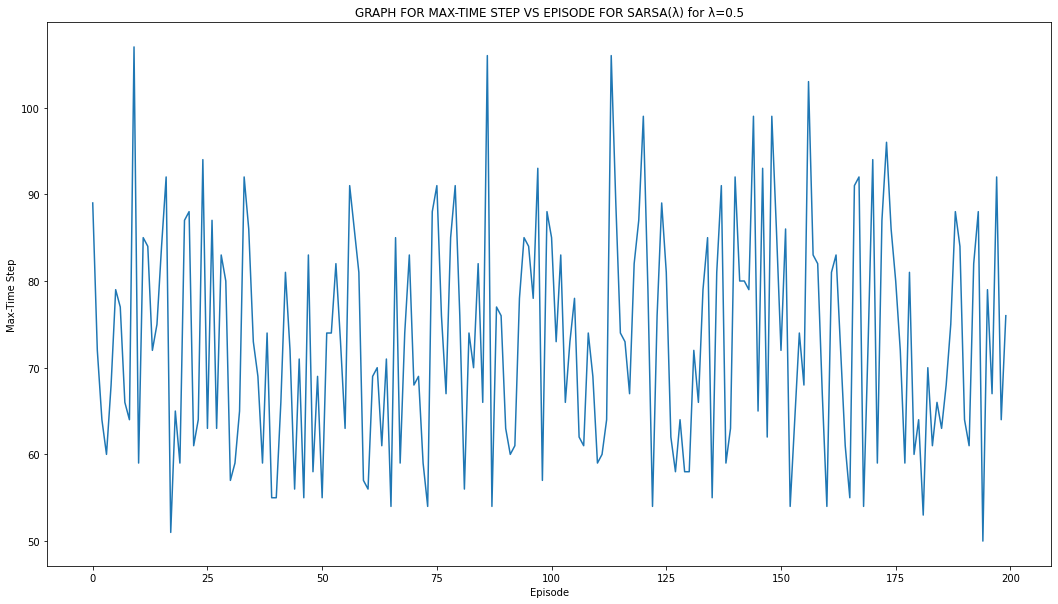

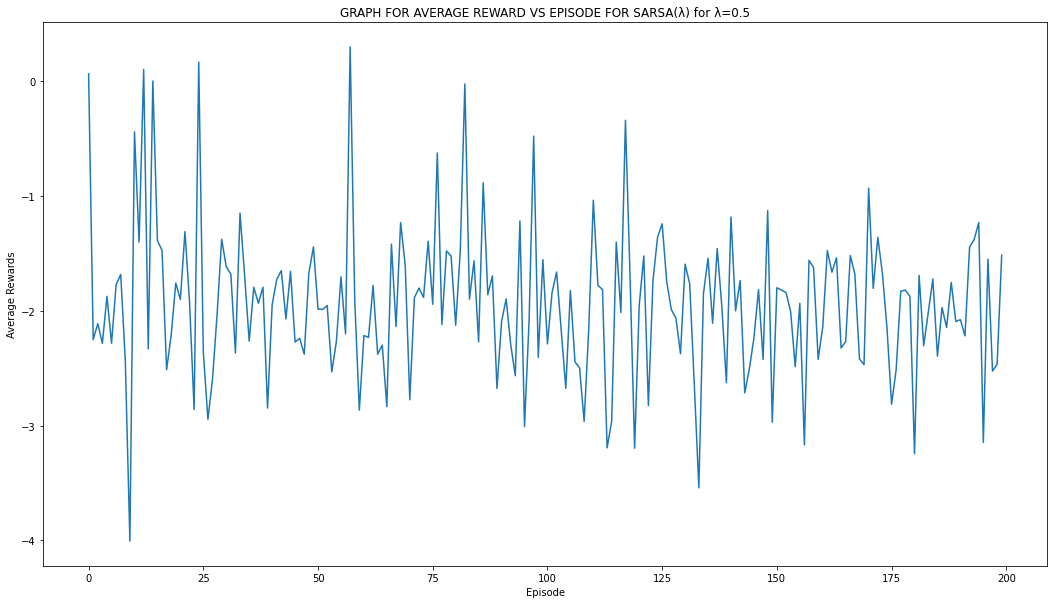

In [ ]:
#took more than 17 mins for 200 episodes, that's why executed just on 200 episodes

plt_12 = plt.figure(figsize = (18,10))
Q4, time_steps4, avg_rewards4 = sarsa_lambda(200)

plt.plot(time_steps4)
plt.title('GRAPH FOR MAX-TIME STEP VS EPISODE FOR SARSA(λ) for λ=0.5')
plt.xlabel('Episode')
plt.ylabel('Max-Time Step')
plt.show()

print('\n')


plt_12 = plt.figure(figsize = (18,10))
plt.plot(avg_rewards4)
plt.title('GRAPH FOR AVERAGE REWARD VS EPISODE FOR SARSA(λ) for λ=0.5')
plt.xlabel('Episode')
plt.ylabel('Average Rewards')
plt.show()

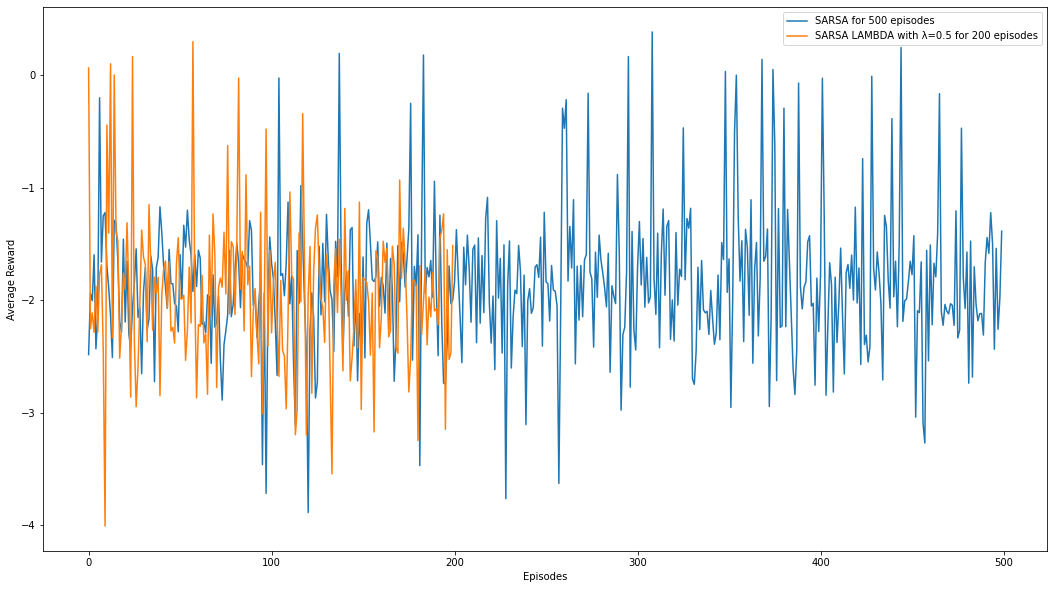

In [ ]:
plt_12 = plt.figure(figsize = (18,10))
avg_r = [avg_rewards,avg_rewards4]
for i in avg_r:
  if i==avg_rewards:
    state = 'SARSA for 500 episodes'
  else:
    state = 'SARSA LAMBDA with λ=0.5 for 200 episodes'
  plt.plot(i, label = f'{state}')
  plt.xlabel('Episodes')
  plt.ylabel('Average Reward')
  plt.legend()

SARSA(lambda) and SARSA are both reinforcement learning algorithms that belong to the class of temporal difference (TD) learning methods. The main difference between the two is that SARSA(lambda) is a variant of SARSA that uses eligibility traces to update the action-value function, whereas SARSA updates the action-value function based only on the current state-action-reward-state-action (SARSA) tuple.

The use of eligibility traces in SARSA(lambda) allows the algorithm to incorporate information from multiple time steps into the updates of the action-value function. This can lead to faster learning and better convergence properties, especially in environments with delayed rewards and long-term dependencies.

Another key difference between SARSA(lambda) and SARSA is that SARSA(lambda) includes an additional hyperparameter, the eligibility trace decay parameter (lambda), which controls the weight given to past time steps in the updates of the action-value function. A lambda value of 0 results in SARSA behavior, whereas a lambda value of 1 gives maximum weight to all past time steps.

One potential drawback of SARSA(lambda) is that it is more computationally expensive than SARSA, as it requires maintaining eligibility traces for each state-action pair. Additionally, the choice of lambda can be nontrivial and may require some trial-and-error experimentation to find the optimal value for a given problem.

In summary, SARSA(lambda) is a more sophisticated variant of SARSA that offers some advantages over the original algorithm, such as faster learning and improved convergence properties. However, it comes at the cost of increased computational complexity and an additional hyperparameter that must be tuned appropriately. The choice of algorithm will depend on the specific problem at hand and the trade-offs between computational efficiency and learning performance.

**LUNAR LANDER WITH RENDER**

---



In [ ]:
env = gym.make("LunarLander-v2", continuous = False, render_mode="human")
env.reset()

(array([ 8.6555479e-04,  1.4021287e+00,  8.7653771e-02, -3.9072874e-01,
        -9.9615904e-04, -1.9854886e-02,  0.0000000e+00,  0.0000000e+00],
       dtype=float32), {})

1. SARSA

In [ ]:
#SARSA implementation with render

def sarsa_r(num_episodes, eps=0.1,alpha=0.01,gamma = 0.9):
  obs_high = 	[1.5, 1.5, 5.0, 5.0, 3.14, 5.0, 1.0, 1.0]
  obs_low = [-1.5, -1.5, -5.0, -5.0, -3.14, -5.0, -0.0, -0.0 ]
  Q = {}
  time_steps = []
  avg_rewards = []

  for i in range(num_episodes):
    state = env.reset()
    state = tuple(state[0])
    sum_rewards = 0
    len_epi = 1

    #Incase the state is not already present in Q, initialise the Q values for all actions to be zero
    if state not in Q:
      Q[state] = {0:0,1:0,2:0,3:0}
    done = False

    if np.random.rand()<eps:
      action = np.random.randint(0,3)
    else:
      v = list(Q[state].values())
      k = list(Q[state].keys())
      action = k[v.index(max(v))]

    while not done:
      next_state, reward, done, _ , info = env.step(action)
      sum_rewards+=reward
      len_epi+=1
      next_state = tuple(next_state)
      if next_state not in Q:
        Q[next_state] = {0:0,1:0,2:0,3:0}

      #epsilon-greedy policy for generating the episode
      if np.random.rand()<eps:
        action2 = np.random.randint(0,3)
      else:
        v2 = list(Q[next_state].values())
        k2 = list(Q[next_state].keys())
        action2 = k2[v2.index(max(v2))]
      
      #updating the Q values according to expected sarsa algo   
      Q[state][action] = Q[state][action] + alpha*(reward + (gamma*Q[next_state][action2]) - Q[state][action])
      state = next_state
      action = action2

      #rendering on the initial, mid and final episode
      if i==0 or i==num_episodes//2 or i==num_episodes-1:
         print("For ", i+1 ,"th episode: ")
         render()

    #taking avg reward as total reward in an episode divided by it's length
    avg_rewards.append(sum_rewards/len_epi)
    time_steps.append(len_epi)


  return Q, time_steps, avg_rewards


GRAPH FOR MAX-TIME STEP VS EPISODE


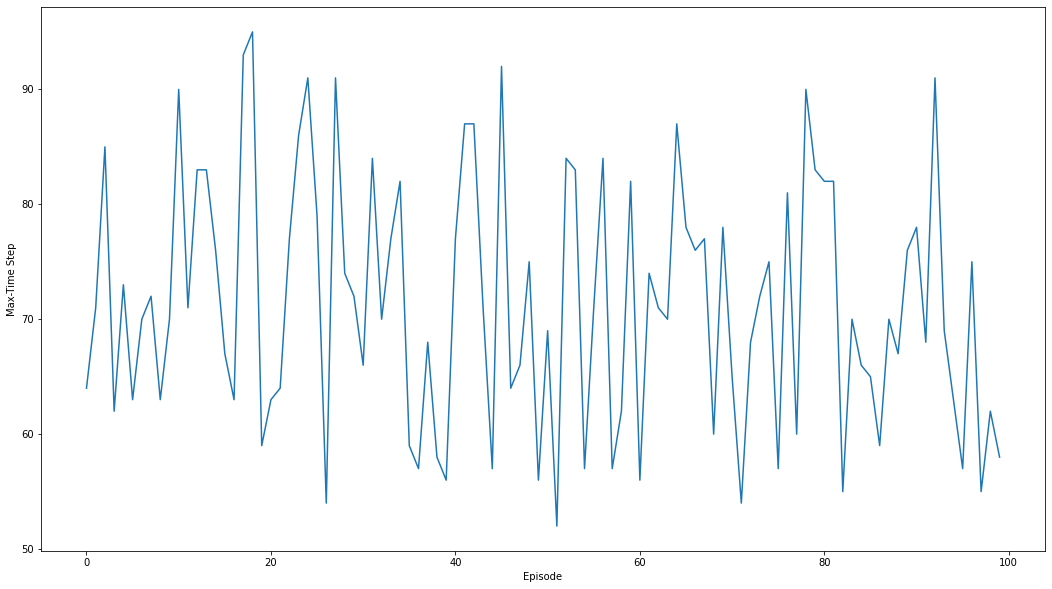



GRAPH FOR AVERAGE REWARD VS EPISODE


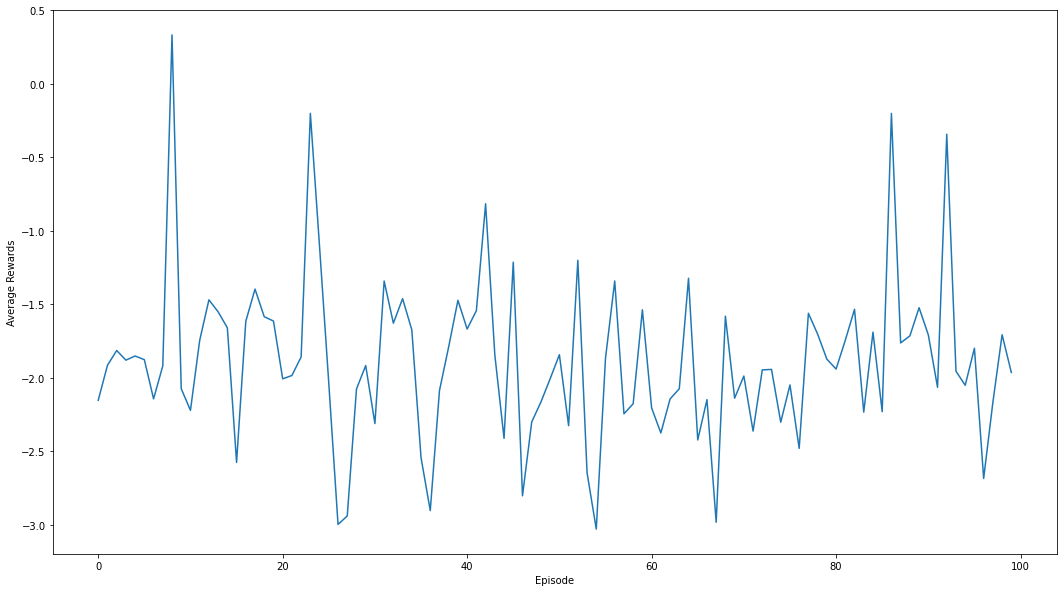

In [ ]:
## Along with render() function, it might take more than 20 mins for 500 episodes, but when used without render (used in SARSA function defined above), then it takes less than 1-2 mins
# For 300 episodes, with render, it took 9 mins 39 sec 
#graph for average rewards vs episode and max time step vs episode for sarsa

plt_12 = plt.figure(figsize = (18,10))
num_epi = 500
Q, time_steps, avg_rewards = sarsa_r(num_epi)

print('GRAPH FOR MAX-TIME STEP VS EPISODE')
plt.plot(time_steps)
plt.xlabel('Episode')
plt.ylabel('Max-Time Step')
plt.show()

print('\n')

print('GRAPH FOR AVERAGE REWARD VS EPISODE')
plt_12 = plt.figure(figsize = (18,10))
plt.plot(avg_rewards)
plt.xlabel('Episode')
plt.ylabel('Average Rewards')
plt.show()

In [ ]:
#graphs for various combinations of alpha and epsilon
#with render 
#took more than 50 mins for 200 episodes since all combinations of alpha and epsilon are tried
#Here, i have used sarsa without render i.e sarsa() function and not sarsa_r() bcoz we just need the graphs. But since while making the environment, we used render-mode, it might take some time as compared to the one in 'Lunar Lander without render' subsection 
#if trying this with render, please try reducing the episodes to 100 or less else it takes a lot of time


plt_12 = plt.figure(figsize = (18,10))

alpha = [0.0005,0.005,0.01,0.1]
eps = [0.9,0.5,0.3,0.1]

for i in range(4):
  for j in range(4):
    alp = alpha[i]
    ep = eps[j]
    Q3, time_steps3, avg_rewards3 = sarsa(200,eps = ep, alpha=alp)
    plt.plot(avg_rewards3,label = f'Alpha = {alp}, epsilon = {ep}')
    plt.xlabel('Episode')
    plt.ylabel('AVG reward')
    plt.legend()


GRAPH FOR MAX-TIME STEP VS EPISODE


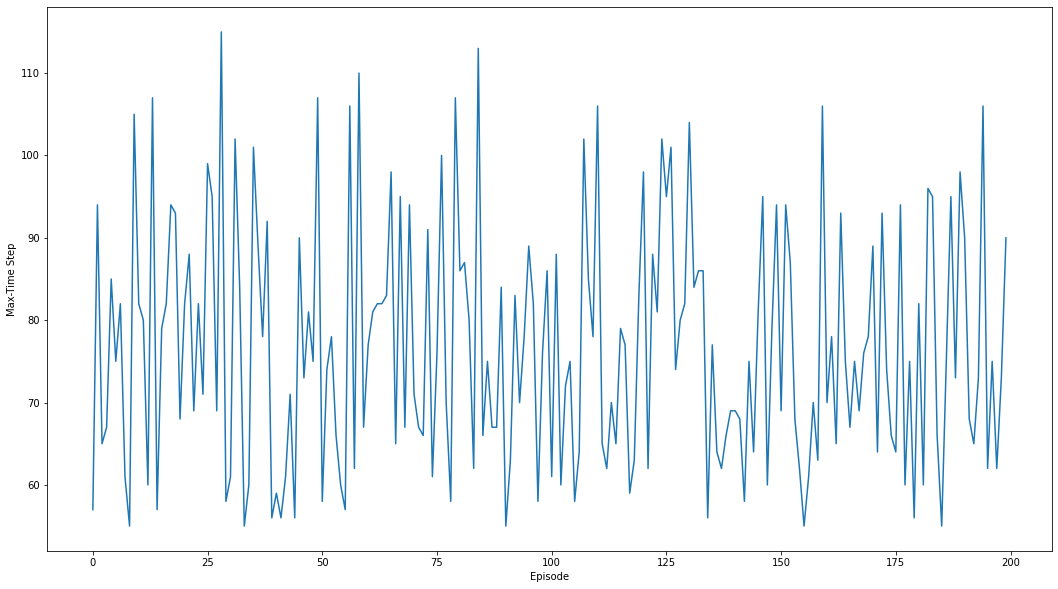



GRAPH FOR AVERAGE REWARD VS EPISODE


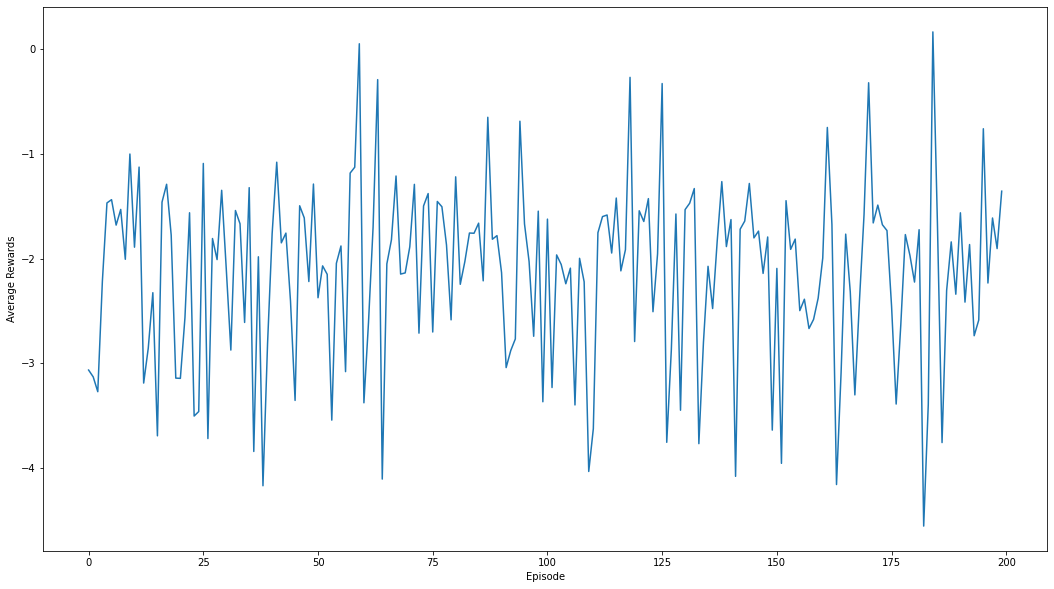

In [ ]:
#graphs for average rewards vs episode and max time step vs episode for expected sarsa 
#with video rendered for the best combination i.e epsilon=0.3 and alpha = 0.005

plt_12 = plt.figure(figsize = (18,10))
Q, time_steps2, avg_rewards2 = sarsa_r(200,eps=0.3,alpha=0.005)

print('GRAPH FOR MAX-TIME STEP VS EPISODE')
plt.plot(time_steps2)
plt.xlabel('Episode')
plt.ylabel('Max-Time Step')
plt.show()

print('\n')

print('GRAPH FOR AVERAGE REWARD VS EPISODE')
plt_12 = plt.figure(figsize = (18,10))
plt.plot(avg_rewards2)
plt.xlabel('Episode')
plt.ylabel('Average Rewards')
plt.show()

2. EXPECTED SARSA

In [ ]:
#Expected Sarsa with render mode 
#This is off policy implementation of Expected SARSA with the behaviour policy being epsilon greedy and the output policy being deterministic


def expected_sarsa_r(num_episodes, eps=0.1,alpha=0.01,gamma = 0.9):
  obs_high = 	[1.5, 1.5, 5.0, 5.0, 3.14, 5.0, 1.0, 1.0]
  obs_low = [-1.5, -1.5, -5.0, -5.0, -3.14, -5.0, -0.0, -0.0 ]
  Q = {}
  time_steps2 = []
  avg_rewards2 = []
  policy = {}             #Output policy that is updated and improved

  for i in range(num_episodes):
    state = env.reset()
    state = tuple(state[0])

    #Incase the state is not already present in Q, initialise the Q values for all actions to be zero
    if state not in Q:
      Q[state] = {0:0,1:0,2:0,3:0}

    #Incase state does not already exist in policy, then assign policy[state]=0 arbitrarily, i.e it will take action 0 when in state 'state'
    #policy is improved with time, this is just initialisation step
    if state not in policy:
      policy[state] = 0
    done = False
    sum_rewards=0
    len_epi=1

    #epsilon-greedy policy for generating the episode
    if np.random.rand()<eps:
      action = np.random.randint(0,3)
    else:
      v = list(Q[state].values())
      k = list(Q[state].keys())
      action = k[v.index(max(v))]

    #Generate the episode
    while not done:
      next_state, reward, done, _ , info = env.step(action)
      sum_rewards+=reward
      len_epi+=1
      next_state = tuple(next_state)
      if next_state not in Q:
        Q[next_state] = {0:0,1:0,2:0,3:0}
      if next_state not in policy:
        policy[next_state] = 0

      #updating the Q values according to expected sarsa algo   
      Q[state][action] = Q[state][action] + alpha*(reward + (gamma*Q[next_state][policy[next_state]]) - Q[state][action])
      v2 = list(Q[state].values())
      k2 = list(Q[state].keys())
      action2 = k2[v2.index(max(v2))]

      #updating the policy for state
      policy[state] = action2

      #rendering on the initial, mid and final episode
      if i==0 or i==num_episodes//2 or i==num_episodes-1:
        print("For ", i+1, "th episode: ")
        render()

      #if the updated action is not same as the previous one, break out of the loop and generate the episode again
      if action!=action2:
        break

      
      state = next_state
      action = action2


    #taking avg reward as total reward in an episode divided by it's length
    avg_rewards2.append(sum_rewards/len_epi)
    time_steps2.append(len_epi)


  return Q, time_steps2, avg_rewards2


GRAPH FOR MAX-TIME STEP VS EPISODE


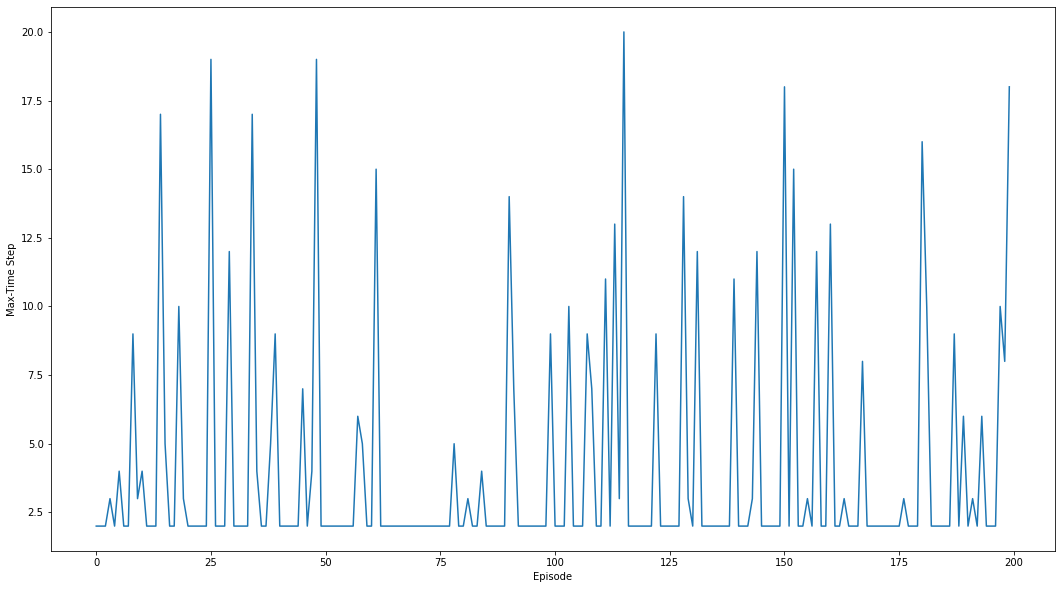



GRAPH FOR AVERAGE REWARD VS EPISODE


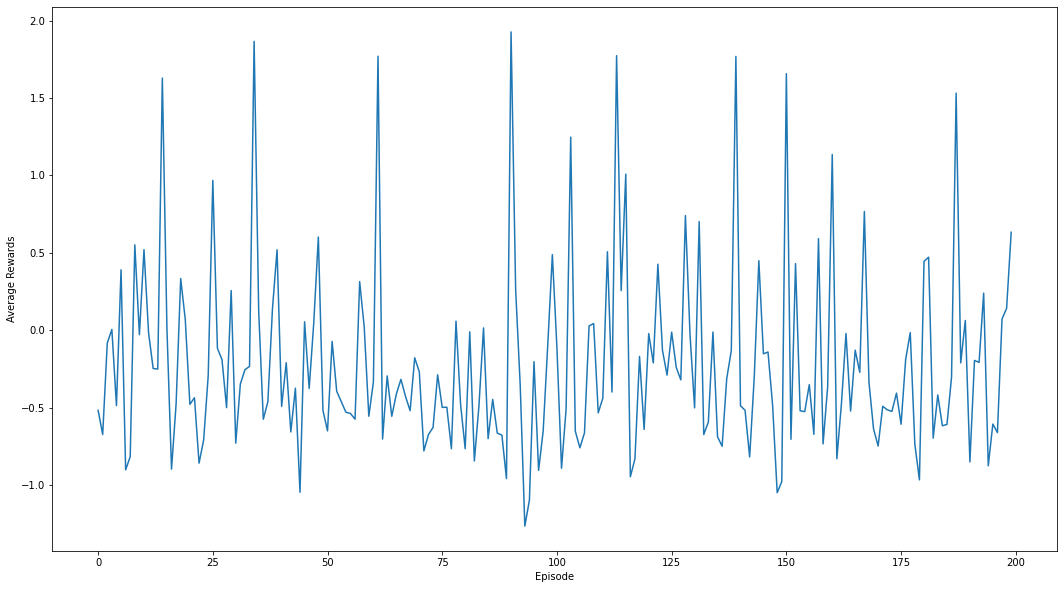

In [ ]:
#graphs for average rewards vs episode and max time step vs episode for expected sarsa 

plt_12 = plt.figure(figsize = (18,10))
Q, time_steps2, avg_rewards2 = expected_sarsa_r(200)

print('GRAPH FOR MAX-TIME STEP VS EPISODE')
plt.plot(time_steps2)
plt.xlabel('Episode')
plt.ylabel('Max-Time Step')
plt.show()

print('\n')

print('GRAPH FOR AVERAGE REWARD VS EPISODE')
plt_12 = plt.figure(figsize = (18,10))
plt.plot(avg_rewards2)
plt.xlabel('Episode')
plt.ylabel('Average Rewards')
plt.show()

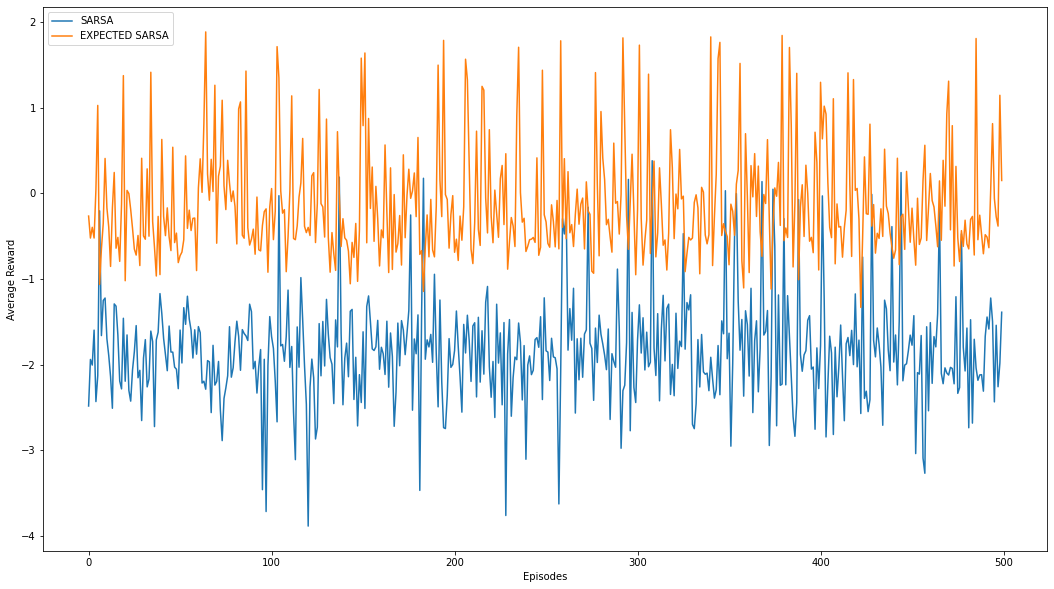

In [ ]:
#graphs for comparing SARSA AND EXPECTED SARSA based on average rewards

plt_12 = plt.figure(figsize = (18,10))
avg_r = [avg_rewards,avg_rewards2]
for i in avg_r:
  if i==avg_rewards:
    state = 'SARSA'
  else:
    state = 'EXPECTED SARSA'
  plt.plot(i, label = f'{state}')
  plt.xlabel('Episodes')
  plt.ylabel('Average Reward')
  plt.legend()

In [ ]:
#graphs for comparing SARSA AND EXPECTED SARSA based on max time step vs episode

plt_12 = plt.figure(figsize = (18,10))
avg_r = [time_steps,time_steps2]
for i in avg_r:
  if i==time_steps:
    state = 'SARSA'
  else:
    state = 'EXPECTED SARSA'
  plt.plot(i, label = f'{state}')
  plt.xlabel('Episodes')
  plt.ylabel('Max-Time Steps')
  plt.legend()